# Descargar GOES-R

## Instalar librerias necesarias

Vamos a crear un nuevo ambiente virtual. En mi caso tendrá el nombre goes_r. Además instalaré algunas librerías necesarias para trabajar con datos GOES-R.


```bash
conda create --name goes_r -c conda-forge matplotlib netcdf4 cartopy xarray boto3 gdal scipy pandas Python=x.x.xx
```

Podemos ver varias instrucciones de GOES-R en esta [guía de usuario](https://storage.googleapis.com/gcs-public-datasets/GOES-R%20beginners%20guide%20-%20ES.pdf). 

### Importante

Los codigos que vamos a trabajar en esta secciónn fueron desarrollados el [CPTEC/INPE-Brasil](https://geonetcast.wordpress.com/2021/02/25/vlab-processamento-de-dados-de-satelites-geoestacionarios-pre-curso/). Pueden encontrar un vídeo extenso del curso en la siguiente página [link](https://www.youtube.com/watch?v=ESlTKAGRgbY).



### Vamos a descargar GOES-R

Descargaremos datos desde el [Servicio Web de Amazon (AWS)](https://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi).

## Leer el archivo netCDF

### Primero, vamos a leer con **`xarray`** 

In [1]:
import xarray as xr

In [2]:
ds = xr.open_dataset('data/OR_ABI-L2-CMIPF-M6C13_G16_s20223041800203_e20223041809522_c20223041810015.nc')
ds

<xarray.Dataset>
Dimensions:                                           (y: 5424, x: 5424,
                                                       number_of_time_bounds: 2,
                                                       number_of_image_bounds: 2,
                                                       band: 1)
Coordinates:
    t                                                 datetime64[ns] ...
  * y                                                 (y) float64 0.1518 ... ...
  * x                                                 (x) float64 -0.1518 ......
    y_image                                           float32 ...
    x_image                                           float32 ...
    band_wavelength                                   (band) float32 ...
    band_id                                           (band) int32 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                band
Data variables: (12/35)
    CMI                                               (y, x) float32 ...
    DQF                                               (y, x) float32 ...
    time_bounds                                       (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                            int32 ...
    y_image_bounds                                    (number_of_image_bounds) float32 ...
    x_image_bounds                                    (number_of_image_bounds) float32 ...
    ...                                                ...
    focal_plane_temperature_threshold_exceeded_count  float64 ...
    maximum_focal_plane_temperature                   float32 ...
    focal_plane_temperature_threshold_increasing      float32 ...
    focal_plane_temperature_threshold_decreasing      float32 ...
    channel_integration_time                          float64 ...
    channel_gain_field                                float64 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2022-10-27T00:00:31.9Z
    time_coverage_end:         2022-10-27T00:09:39.6Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        919aa206-e73f-4bb1-a8a0-93f8a2c4a05a

### Ahora, vamos a leer con **`netCDF4`** 

In [4]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt


In [5]:
file = Dataset('data/OR_ABI-L2-CMIPF-M6C13_G16_s20223041800203_e20223041809522_c20223041810015.nc')
file

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (v35, 20 July 2016)
    institution: DOC/NOAA/NESDIS > U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    production_site: NSOF
    production_environment: OE
    spatial_resolution: 2km at nadir
    orbital_slot: GOES-West
    platform_ID: G17
    instrument_type: GOES R Series Advanced Baseline Imager
    scene_id: Full Disk
    instrument_ID: FM2
    dataset_name: OR_ABI-L2-CMIPF-M6C13_G17_s20223000000319_e20223000009396_c20223000009474.nc
    iso_series_metadata_id: 8c9e8150-3692-11e3-aa6e-0800200c9a66
    title: ABI L2 Cloud and Moisture Imagery
    summary: Single emissive band Cloud and Moisture Imagery Products a

In [6]:
# Get the pixel values
data = file.variables['CMI'][:]
data

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=65535,
  dtype=float32)

## Vamos a visualizar y ver si hay alguna diferencia

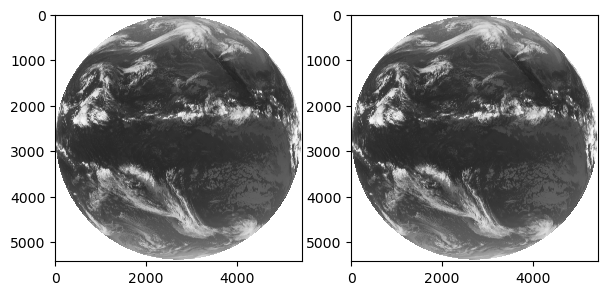

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2 ,figsize=(7,7))
ax1.imshow(data, vmin=193, vmax=313, cmap='Greys')
ax2.imshow(ds['CMI'].values, vmin=193, vmax=313, cmap='Greys')

### ¿Hay alguna diferencia?

### Vamos a darle proyección a la figura usando **`cartopy`**

In [11]:
import cartopy, cartopy.crs as ccrs 

Convertimos los de Kelvin para Celsus

In [16]:
data = file.variables['CMI'][:] - 273.16

Recuerda que los datos del GOES-R están en una posición geoestacionaria. Los parámetros como longitud central y altura del satélite están en el metadato. Además el área que el satélite observa también están en el metadato.

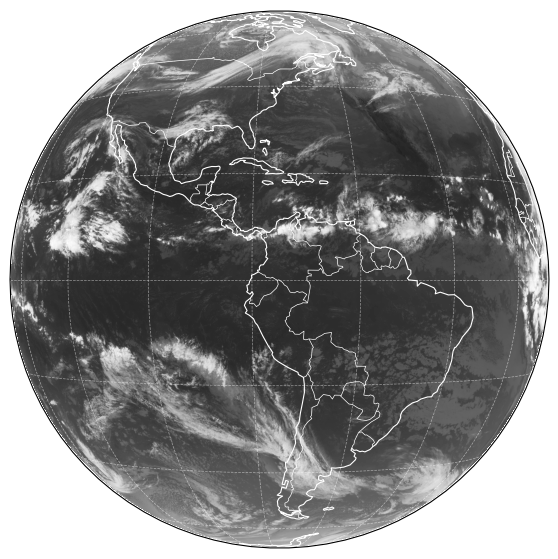

In [20]:
# Elijamos el tamaño de la figura (ancho x alto, en pulgadas)
plt.figure(figsize=(7,7))
 
# Usamos la proyección geoestacionaria en cartopy
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=-75.0, satellite_height=35786023.0))
img_extent = (-5434894.67527,5434894.67527,-5434894.67527,5434894.67527)
 
# Agregar líneas de costa, bordes y líneas de cuadrícula
ax.coastlines(color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
ax.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=0.5)

# Agregamos la matriz de datos
img = ax.imshow(data, vmin=-80, vmax=40, origin='upper', extent=img_extent, cmap='Greys')


In [1]:
from netCDF4 import Dataset                     # Read / Write NetCDF4 files
import matplotlib.pyplot as plt                 # Plotting library
from datetime import datetime                   # Basic Dates and time types
import cartopy, cartopy.crs as ccrs             # Plot maps
import os                                       # Miscellaneous operating system interfaces
from osgeo import osr                           # Python bindings for GDAL
from osgeo import gdal                          # Python bindings for GDAL
import numpy as np                              # Scientific computing with Python
from utilities import download_CMI              # Our function for download
gdal.PushErrorHandler('CPLQuietErrorHandler')   # Ignore GDAL warnings

0

In [2]:
# Input and output directories
input = "Samples"; os.makedirs(input, exist_ok=True)
output = "Output"; os.makedirs(output, exist_ok=True)

# Desired extent
extent = [-85.0, -20.0, -65.0, 2.0] # Min lon, Min lat lon, Max lon, Max lat

# AMAZON repository information 
# https://noaa-goes16.s3.amazonaws.com/index.html
bucket_name = 'noaa-goes16'
product_name = 'ABI-L2-CMIPF'
yyyymmddhhmn = '202210271800' 
band = '13'

# Download the file
file_name = download_CMI(yyyymmddhhmn, band, input)


In [3]:
var = 'CMI'

# Open the file
img = gdal.Open(f'NETCDF:{input}/{file_name}.nc:' + var)

# Read the header metadata
metadata = img.GetMetadata()
scale = float(metadata.get(var + '#scale_factor'))
offset = float(metadata.get(var + '#add_offset'))
undef = float(metadata.get(var + '#_FillValue'))
dtime = metadata.get('NC_GLOBAL#time_coverage_start')

# Load the data
ds = img.ReadAsArray(0, 0, img.RasterXSize, img.RasterYSize).astype(float)

# Apply the scale, offset and convert to celsius
ds = (ds * scale + offset) - 273.15

# Read the original file projection and configure the output projection
source_prj = osr.SpatialReference()
source_prj.ImportFromProj4(img.GetProjectionRef())

target_prj = osr.SpatialReference()
target_prj.ImportFromProj4("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

# Reproject the data
GeoT = img.GetGeoTransform()
driver = gdal.GetDriverByName('MEM')
raw = driver.Create('raw', ds.shape[0], ds.shape[1], 1, gdal.GDT_Float32)
raw.SetGeoTransform(GeoT)
raw.GetRasterBand(1).WriteArray(ds)

# Define the parameters of the output file  
kwargs = {'format': 'netCDF', \
          'srcSRS': source_prj, \
          'dstSRS': target_prj, \
          'outputBounds': (extent[0], extent[3], extent[2], extent[1]), \
          'outputBoundsSRS': target_prj, \
          'outputType': gdal.GDT_Float32, \
          'srcNodata': undef, \
          'dstNodata': 'nan', \
          'xRes': 0.02, \
          'yRes': 0.02, \
          'resampleAlg': gdal.GRA_NearestNeighbour}

# Write the reprojected file on disk
gdal.Warp(f'{output}/{file_name}_ret.nc', raw, **kwargs)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f7f0c6927b0> >

Text(0.0, 1.0, 'GOES-16 Band 13 2022-10-27 18:00 UTC')

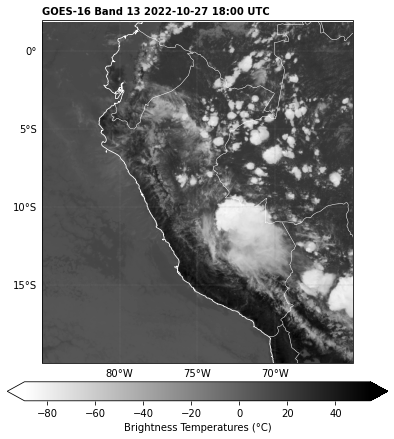

In [4]:
# Open the reprojected GOES-R image
file = Dataset(f'{output}/{file_name}_ret.nc')

# Get the pixel values
data = file.variables['Band1'][:]
#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(7,7))

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Define the color scale based on the channel
colormap = "gray_r" # White to black for IR channels
    
# Plot the image
img = ax.imshow(data, origin='upper', extent=img_extent, cmap=colormap)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--',
linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), 
draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Add a colorbar
plt.colorbar(img, label='Brightness Temperatures (°C)', extend='both', 
orientation='horizontal', pad=0.05, fraction=0.05)

# Extract the date
date = (datetime.strptime(dtime, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Add a title
plt.title('GOES-16 Band 13 ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', 
fontweight='bold', fontsize=10, loc='left')
#plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')